In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
def getData(path):
    df = pd.read_csv(path)
    df = df.iloc[:, 1:]
    print(df.shape)
    print(df)

    dataSet = df.to_numpy()

    np.random.seed(222)
    np.random.shuffle(dataSet)

    y = dataSet[:,-1:]
    X = dataSet[:,:-1]

    print('dim mat: ', X.shape)
    print('dim class: ', y.shape)
    return [X, y]

path = 'data/cooked/google-third-place-Boston_DistanceClosest.csv'
[X_dis, y_dis] = getData(path)

(3469, 96)
      beauty_salon    campground       stadium       airport    car_rental  \
0              0.0  10000.000000   1176.386688   7705.058494   4593.449888   
1              0.0  10000.000000    626.302322   7257.056701   4566.538357   
2              0.0  10000.000000   1704.031081   6365.252320   3377.450123   
3              0.0  10000.000000   1474.361742   7318.770682   3420.608347   
4              0.0  10000.000000   2072.640146   5567.837906   2957.225291   
...            ...           ...           ...           ...           ...   
3464       10000.0  10000.000000  10000.000000  10000.000000  10000.000000   
3465       10000.0   6575.114117  10000.000000   9001.981571  10000.000000   
3466       10000.0   6158.261646  10000.000000   7882.893552  10000.000000   
3467       10000.0   5668.794936  10000.000000   3133.199277  10000.000000   
3468       10000.0  10000.000000  10000.000000  10000.000000  10000.000000   

         locksmith       embassy          cafe      

In [59]:
def processDataForTrain(X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    stdScaleDis = StandardScaler()
    stdScaleDis.fit(X_train)
    X_train = stdScaleDis.transform(X_train)
    X_test  = stdScaleDis.transform(X_test)
    ### test – addressing bug where shape in train_x and train_y aren't equal
    Y_df = pd.DataFrame(to_categorical(Y_train))
    Y_df[94] = np.float32(0)
    Y_train = Y_df.to_numpy()
    Y_train_outHot = Y_train
    ### end test
    # Y_train_outHot = to_categorical(Y_train)
    Y_test_outHot = to_categorical(Y_test)
    xDim = X_train.shape[1]
    yDim = Y_test_outHot.shape[1]

    return {
        'train_x': X_train,
        'test_x': X_test,
        'train_y': Y_train_outHot,
        'test_y': Y_test_outHot,
        'scaler': stdScaleDis,
        
    }
dataTrain_dis = processDataForTrain(X_dis, y_dis)
dataTrain_dis

{'train_x': array([[ 0.58778756,  0.20492766, -0.44250058, ...,  0.17217076,
         -0.58811574,  0.05554484],
        [-1.20561471,  0.20492766, -0.60346778, ..., -0.53594793,
          0.94411705,  0.05554484],
        [ 1.13861432,  0.20492766,  0.14690075, ..., -0.40297893,
         -0.74603439,  0.05554484],
        ...,
        [-0.37148603,  0.20492766,  0.4376173 , ..., -0.15194013,
         -1.41116116,  0.05554484],
        [-0.96695888,  0.20492766, -0.61548671, ..., -0.29542451,
          0.67173491,  0.05554484],
        [ 2.83206377, -8.5532234 ,  4.33631022, ...,  4.46448475,
          2.77651053,  0.05554484]]),
 'test_x': array([[-7.45297714e-01,  2.04927661e-01, -5.46237922e-01, ...,
         -5.70981553e-01,  4.32660982e-01,  5.55448419e-02],
        [ 1.14558864e+00,  2.04927661e-01,  4.11471600e-01, ...,
         -2.78495391e-01, -1.36069239e+00,  5.55448419e-02],
        [ 6.97341467e-04,  2.04927661e-01, -5.26767329e-01, ...,
         -5.02103840e-01, -9.181962

In [9]:
test = pd.DataFrame(dataTrain_dis["train_y"])

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
test[94] = np.float32(0)
test.shape

(2601, 95)

In [40]:
dataTrain_dis["train_y"] = test.to_numpy()
print("Done.")

Done.


In [44]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense

modelDis = Sequential()
modelDis.add(Dense(1024, input_dim=dataTrain_dis['train_x'].shape[1], activation='relu'))
modelDis.add(Dense(512, activation='relu'))
modelDis.add(Dense(dataTrain_dis['train_y'].shape[1], activation='softmax'))
modelDis.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [45]:
print(dataTrain_dis["train_x"].shape[1] == dataTrain_dis["train_y"].shape[1])
print(dataTrain_dis["train_x"].shape[1])
print(dataTrain_dis["train_y"].shape[1])

True
95
95


In [46]:
import time
start_time = time.time()

hist = modelDis.fit( 
    dataTrain_dis['train_x'], dataTrain_dis['train_y'], 
    validation_data=(dataTrain_dis['test_x'], dataTrain_dis['test_y']), 
    batch_size=32,
    epochs=50, 
    )

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
82/82 [==============================] - 0s 4ms/step - loss: 4.0410 - accuracy: 0.0550 - val_loss: 3.8594 - val_accuracy: 0.0553
Epoch 2/50
82/82 [==============================] - 0s 4ms/step - loss: 3.6395 - accuracy: 0.0823 - val_loss: 3.7333 - val_accuracy: 0.0760
Epoch 3/50
82/82 [==============================] - 0s 4ms/step - loss: 3.4814 - accuracy: 0.1073 - val_loss: 3.6763 - val_accuracy: 0.0853
Epoch 4/50
82/82 [==============================] - 0s 4ms/step - loss: 3.3752 - accuracy: 0.1200 - val_loss: 3.6469 - val_accuracy: 0.0956
Epoch 5/50
82/82 [==============================] - 0s 4ms/step - loss: 3.2577 - accuracy: 0.1342 - val_loss: 3.6067 - val_accuracy: 0.0991
Epoch 6/50
82/82 [==============================] - 0s 5ms/step - loss: 3.1408 - accuracy: 0.1519 - val_loss: 3.6727 - val_accuracy: 0.0910
Epoch 7/50
82/82 [==============================] - 0s 4ms/step - loss: 3.0741 - accuracy: 0.1530 - val_loss: 3.6778 - val_accuracy: 0.1037
Epoch 8/50
82/82 [==

28/28 [==============================] - 0s 971us/step - loss: 4.5231 - accuracy: 0.1671
result:  [4.523098945617676, 0.16705068945884705]


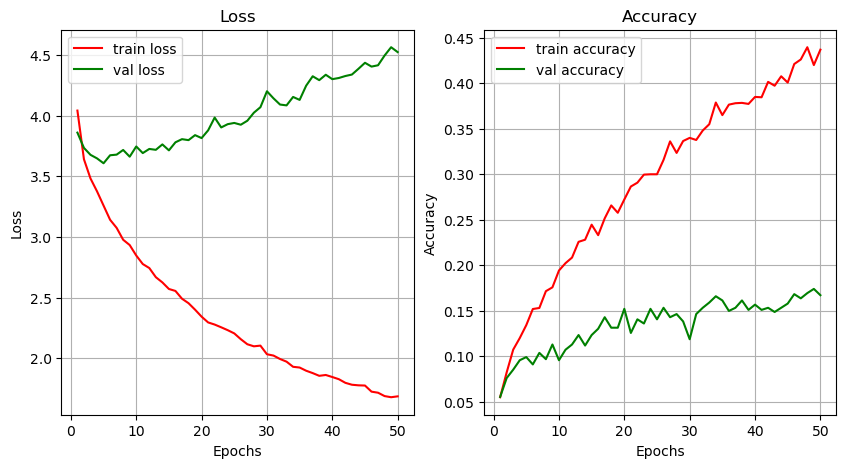

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

result = modelDis.evaluate(dataTrain_dis['test_x'], dataTrain_dis['test_y'])
print('result: ', result)

## 5.2 Decay Model

In [54]:
class ModelThirdPlace:
  def __init__(self, path):
    self.path = path
    [self.X_raw, self.y_raw] = getData(path)
    self.data_train = processDataForTrain(self.X_raw, self.y_raw)

  def buildModel(self):
    self.model = Sequential()
    self.model.add(Dense(1024, input_dim=self.data_train['train_x'].shape[1], activation='relu'))
    self.model.add(Dense(512, activation='relu'))
    self.model.add(Dense(self.data_train['train_y'].shape[1], activation='softmax'))
    self.model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
  def fit(self):
    return self.model.fit( 
      self.data_train['train_x'], self.data_train['train_y'], 
      validation_data=(self.data_train['test_x'], self.data_train['test_y']), 
      batch_size=32,
      epochs=50, 
    )
  def eval(self):
    print('result: ', self.model.evaluate(self.data_train['test_x'], self.data_train['test_y']))


In [60]:
path = 'data/cooked/google-third-place-Boston_DecayClosest.csv'
modelDecay = ModelThirdPlace(path)
modelDecay.buildModel()
hist = modelDecay.fit()

(3469, 96)
       beauty_salon    campground        stadium       airport     car_rental  \
0      1.000000e+00  1.085288e-61   7.333327e-06  2.338401e-34   8.922470e-21   
1      1.000000e+00  1.780782e-59   1.846342e-03  2.110375e-32   1.169361e-20   
2      1.000000e+00  6.772459e-63   3.649522e-08  1.647830e-28   1.811705e-15   
3      1.000000e+00  1.272906e-67   3.670269e-07  1.134985e-32   1.174114e-15   
4      1.000000e+00  9.629472e-63   8.981091e-10  4.982772e-25   1.236765e-13   
...             ...           ...            ...           ...            ...   
3464  4.711788e-214  6.186797e-66  1.069699e-198  4.174068e-64  6.621723e-219   
3465  1.977350e-104  1.999431e-29   3.768292e-89  5.106252e-40  9.771115e-111   
3466   1.709854e-61  1.319430e-27   1.003447e-57  3.914746e-35   8.024641e-80   
3467   7.943764e-82  1.806397e-25   1.192519e-78  2.109575e-14  1.398438e-100   
3468   0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00   0.000000e+00   

          locksm

28/28 [==============================] - 0s 967us/step - loss: 1.0721 - accuracy: 0.7408
result:  [1.072059988975525, 0.7407833933830261]


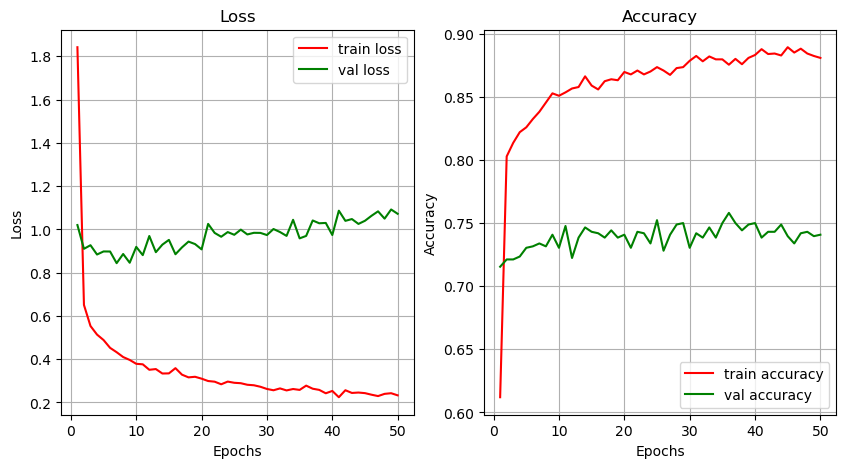

In [61]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

modelDecay.eval()

## 5.3 Prediction

In [62]:
import math
import json
def OpenJson(path): 
    json_file = open(path , 'r')
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data
def getDecay(cost, b = 0.01): # { // 0.002 // 0.999
    return math.pow(1 - b, cost)
def distanceGPS2KM(l0, l1): # get distance(KM)
    R = 6378.137; # Radius of earth in KM // a = Equatorial radius (6,378.1370 km) // b = Polar radius (6,356.7523 km)
    dLat = l1['lat'] * math.pi / 180 - l0['lat'] * math.pi / 180
    dLon = l1['lon'] * math.pi / 180 - l0['lon'] * math.pi / 180
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(l0['lat'] * math.pi / 180) * math.cos(l1['lat'] * math.pi / 180) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d # * 1000; # // * 1000; // meters
    # return d; # // * 1000; // meters
def distanceGPS2Meter(l0, l1):
    return distanceGPS2KM(l0, l1) * 1000
def distance2(x0, y0, x1, y1):
    return ((x1 - x0) * (x1 - x0)) + ((y1 - y0) * (y1 - y0))
def distance(l0, l1):
    return math.sqrt(distance2(l0['lon'], l0['lat'], l1['lon'], l1['lat']))
def GetDistanceClosest (loc, data, classList):
    distanceList = []
    for i in classList:
        distanceValue = 10000
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            value = distanceGPS2Meter(loc, otherLoc)
            if (value < distanceValue):
                distanceValue = value
        distanceList.append(distanceValue)
    return distanceList
def GetDistanceDecayClosest(loc, data, classList, BATA = 0.01):
    distanceList = []
    for i in classList:
        distanceValue = 0
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            value = getDecay(distanceGPS2Meter(loc, otherLoc), BATA)
            if distanceValue < value:
                distanceValue = value
        # if len(data[i]) != 0:
        #     distanceValue = distanceValue / len(data[i])
        distanceList.append(distanceValue)
    return distanceList

In [63]:
THE_PATH = "data/raw/google-third-place-Boston.json"
DATA_DIC = OpenJson(THE_PATH)
CLASS_LIST = []
for i in DATA_DIC:
    if i not in CLASS_LIST:
        CLASS_LIST.append(i)

print(len(CLASS_LIST))
print(CLASS_LIST)

95
['beauty_salon', 'campground', 'stadium', 'airport', 'car_rental', 'locksmith', 'embassy', 'cafe', 'laundry', 'aquarium', 'convenience_store', 'moving_company', 'car_wash', 'bus_station', 'rv_park', 'dentist', 'shopping_mall', 'hospital', 'store', 'car_dealer', 'home_goods_store', 'grocery_or_supermarket', 'restaurant', 'bank', 'painter', 'insurance_agency', 'health', 'post_office', 'department_store', 'city_hall', 'parking', 'night_club', 'car_repair', 'bowling_alley', 'bicycle_store', 'veterinary_care', 'subway_station', 'synagogue', 'liquor_store', 'local_government_office', 'roofing_contractor', 'shoe_store', 'florist', 'train_station', 'food', 'art_gallery', 'hindu_temple', 'travel_agency', 'gym', 'electrician', 'doctor', 'accounting', 'amusement_park', 'movie_theater', 'bar', 'atm', 'taxi_stand', 'electronics_store', 'church', 'pet_storepharmacy', 'library', 'book_store', 'cemetery', 'general_contractor', 'funeral_home', 'clothing_store', 'mosque', 'gas_station', 'police', 'lo

In [64]:

# https://www.google.com/maps/@42.3334714,-71.0793878,16.46z
# https://www.google.com/maps/@42.345085,-71.0674257,17z
# https://www.google.com/maps/place/75-113+St+James+Ave+Parking/@42.3502316,-71.0760466,17.98z

locs = [
    { 'lat': 42.345085, 'lon':-71.0674257 },
    { 'lat': 42.3334714, 'lon':-71.0793878 },
    { 'lat': 42.341134, 'lon':-71.082955 },
    { 'lat': 42.3502316, 'lon':-71.0760466 },
]

resultsDis = []
resultsDecay = []
for i in locs:
    result = GetDistanceClosest(i, DATA_DIC, CLASS_LIST)
    resultsDis.append(result)
    
    result = GetDistanceDecayClosest(i, DATA_DIC, CLASS_LIST)
    resultsDecay.append(result)

resultsDis = dataTrain_dis['scaler'].transform(resultsDis)
resultsDecay = modelDecay.data_train['scaler'].transform(resultsDecay)

In [65]:
predictionsDecay = modelDecay.model.predict(resultsDecay)
print(predictionsDecay.shape)

predictionsDis = modelDis.predict(resultsDis)
print(predictionsDis.shape)

for i in range(predictionsDis.shape[0]):
    print('model by distance: ', CLASS_LIST[np.argmax(predictionsDis[i])]) 

print('------------------')

for i in range(predictionsDecay.shape[0]):
    print('model by decay: ', CLASS_LIST[np.argmax(predictionsDecay[i])]) 

1/1 [==============================] - 0s 37ms/step
(4, 95)
1/1 [==============================] - 0s 28ms/step
(4, 95)
model by distance:  bicycle_store
model by distance:  furniture_store
model by distance:  laundry
model by distance:  finance
------------------
model by decay:  locksmith
model by decay:  furniture_store
model by decay:  laundry
model by decay:  embassy


## 5.4 Decay Model (small) and Prediction

In [66]:
class ModelThirdPlaceSmall(ModelThirdPlace):
  def buildModel(self):
    self.model = Sequential()
    self.model.add(Dense(95, input_dim=self.data_train['train_x'].shape[1], activation='relu'))
    self.model.add(Dropout(0.75))
    self.model.add(Dense(self.data_train['train_y'].shape[1], activation='softmax'))
    self.model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [67]:
paths = [
    'data/cooked/google-third-place-Boston_DistanceClosest.csv',
    'data/cooked/google-third-place-Boston_DecayClosest.csv',
]

model = ModelThirdPlaceSmall(paths[0])
model.buildModel()
model.fit()
model.eval()
resultsDisScaled = model.data_train['scaler'].transform(resultsDis)
predictionsDis = model.model.predict(resultsDisScaled)
for i in range(predictionsDis.shape[0]):
    print('model by distance: ', CLASS_LIST[np.argmax(predictionsDis[i])]) 

(3469, 96)
      beauty_salon    campground       stadium       airport    car_rental  \
0              0.0  10000.000000   1176.386688   7705.058494   4593.449888   
1              0.0  10000.000000    626.302322   7257.056701   4566.538357   
2              0.0  10000.000000   1704.031081   6365.252320   3377.450123   
3              0.0  10000.000000   1474.361742   7318.770682   3420.608347   
4              0.0  10000.000000   2072.640146   5567.837906   2957.225291   
...            ...           ...           ...           ...           ...   
3464       10000.0  10000.000000  10000.000000  10000.000000  10000.000000   
3465       10000.0   6575.114117  10000.000000   9001.981571  10000.000000   
3466       10000.0   6158.261646  10000.000000   7882.893552  10000.000000   
3467       10000.0   5668.794936  10000.000000   3133.199277  10000.000000   
3468       10000.0  10000.000000  10000.000000  10000.000000  10000.000000   

         locksmith       embassy          cafe      

In [68]:
model = ModelThirdPlaceSmall(paths[1])
model.buildModel()
model.fit()
model.eval()
resultsDisScaled = model.data_train['scaler'].transform(resultsDecay)
resultsDecay = model.model.predict(resultsDisScaled)
for i in range(resultsDecay.shape[0]):
    print('model by distance: ', CLASS_LIST[np.argmax(resultsDecay[i])]) 

(3469, 96)
       beauty_salon    campground        stadium       airport     car_rental  \
0      1.000000e+00  1.085288e-61   7.333327e-06  2.338401e-34   8.922470e-21   
1      1.000000e+00  1.780782e-59   1.846342e-03  2.110375e-32   1.169361e-20   
2      1.000000e+00  6.772459e-63   3.649522e-08  1.647830e-28   1.811705e-15   
3      1.000000e+00  1.272906e-67   3.670269e-07  1.134985e-32   1.174114e-15   
4      1.000000e+00  9.629472e-63   8.981091e-10  4.982772e-25   1.236765e-13   
...             ...           ...            ...           ...            ...   
3464  4.711788e-214  6.186797e-66  1.069699e-198  4.174068e-64  6.621723e-219   
3465  1.977350e-104  1.999431e-29   3.768292e-89  5.106252e-40  9.771115e-111   
3466   1.709854e-61  1.319430e-27   1.003447e-57  3.914746e-35   8.024641e-80   
3467   7.943764e-82  1.806397e-25   1.192519e-78  2.109575e-14  1.398438e-100   
3468   0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00   0.000000e+00   

          locksm